## Task3：网站点击量预测

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# 忽略警告
warnings.filterwarnings("ignore")
# 正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

### 数据读取


In [4]:
# data = pd.read_csv('dataset/Wikipedia.csv', index_col=0)
data = pd.read_csv('dataset/Wikipedia.csv')

# 查看前10行
print(data.head(10))

                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   
5            5566_zh.wikipedia.org_all-access_spider        12.0         7.0   
6          91Days_zh.wikipedia.org_all-access_spider         NaN         NaN   
7           A'N'D_zh.wikipedia.org_all-access_spider       118.0        26.0   
8           AKB48_zh.wikipedia.org_all-access_spider         5.0        23.0   
9           ASCII_zh.wikipedia.org_all-access_spider         6.0         3.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0     

### 填补缺失值，去除异常值

In [5]:
data = data.interpolate(method='linear').dropna()

### 统计各语言、各访问类型的点击量

In [6]:
row_sums = data.sum(axis=1)
print(row_sums)

0         11966.0
1         13966.0
2          2862.0
3          9419.0
4          6858.5
           ...   
145058     6188.0
145059     6188.0
145060     6188.0
145061     6188.0
145062     6188.0
Length: 145063, dtype: float64


提取出Page列

In [7]:
page = data.iloc[:,0]
print(page)

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object


对各语言各访问类型的点击量进行可视化

In [ ]:
plt.plot(page, row_sums)

### 取西班牙语(es)桌面端(desktop)点击量、西班牙语(es)移动端(mobile-web)点击量数据

In [9]:
data.index = data.index.astype(str)
data.set_index('Page', inplace=True)
data.index

Index(['2NE1_zh.wikipedia.org_all-access_spider',
       '2PM_zh.wikipedia.org_all-access_spider',
       '3C_zh.wikipedia.org_all-access_spider',
       '4minute_zh.wikipedia.org_all-access_spider',
       '52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider',
       '5566_zh.wikipedia.org_all-access_spider',
       '91Days_zh.wikipedia.org_all-access_spider',
       'A'N'D_zh.wikipedia.org_all-access_spider',
       'AKB48_zh.wikipedia.org_all-access_spider',
       'ASCII_zh.wikipedia.org_all-access_spider',
       ...
       'Drake_(músico)_es.wikipedia.org_all-access_spider',
       'Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Doble_tentación_es.wikipedia.org_all-access_spider',
       'Mi_adorable_maldición_es.wikipedia.org_all-access_spider',
       'Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider',
       'Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-ac

In [44]:
dataES_desktop = data.loc['100_metros_es.wikipedia.org_desktop_all-agents':'Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_desktop_all-agents', :]
# print(dataES_desktop, dataES_desktop.shape)

# 把桌面端的点击量求和
dataES_desktop_sum = dataES_desktop.sum(axis=0)
print(dataES_desktop_sum)

2015-07-01    3957814.0
2015-07-02    3827210.0
2015-07-03    3338612.5
2015-07-04    2441112.5
2015-07-05    2854412.5
                ...    
2016-12-27    3545917.0
2016-12-28    3712359.5
2016-12-29    3397740.0
2016-12-30    2172393.5
2016-12-31    1803641.5
Length: 550, dtype: float64


In [11]:
dataES_mobile = data.loc['(500)_Days_of_Summer_es.wikipedia.org_mobile-web_all-agents':'Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_mobile-web_all-agents', :]
# print(dataES_mobile, dataES_mobile.shape)

# 把移动端的点击量求和
dataES_mobile_sum = dataES_mobile.sum(axis=0)
print(dataES_mobile_sum)

2015-07-01    4.139998e+06
2015-07-02    3.919580e+06
2015-07-03    3.718888e+06
2015-07-04    4.159198e+06
2015-07-05    4.324084e+06
                  ...     
2016-12-27    4.174922e+06
2016-12-28    4.300820e+06
2016-12-29    4.224618e+06
2016-12-30    3.661308e+06
2016-12-31    3.700946e+06
Length: 550, dtype: float64


### 分别分析季节性和平稳性

### 数据可视化

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


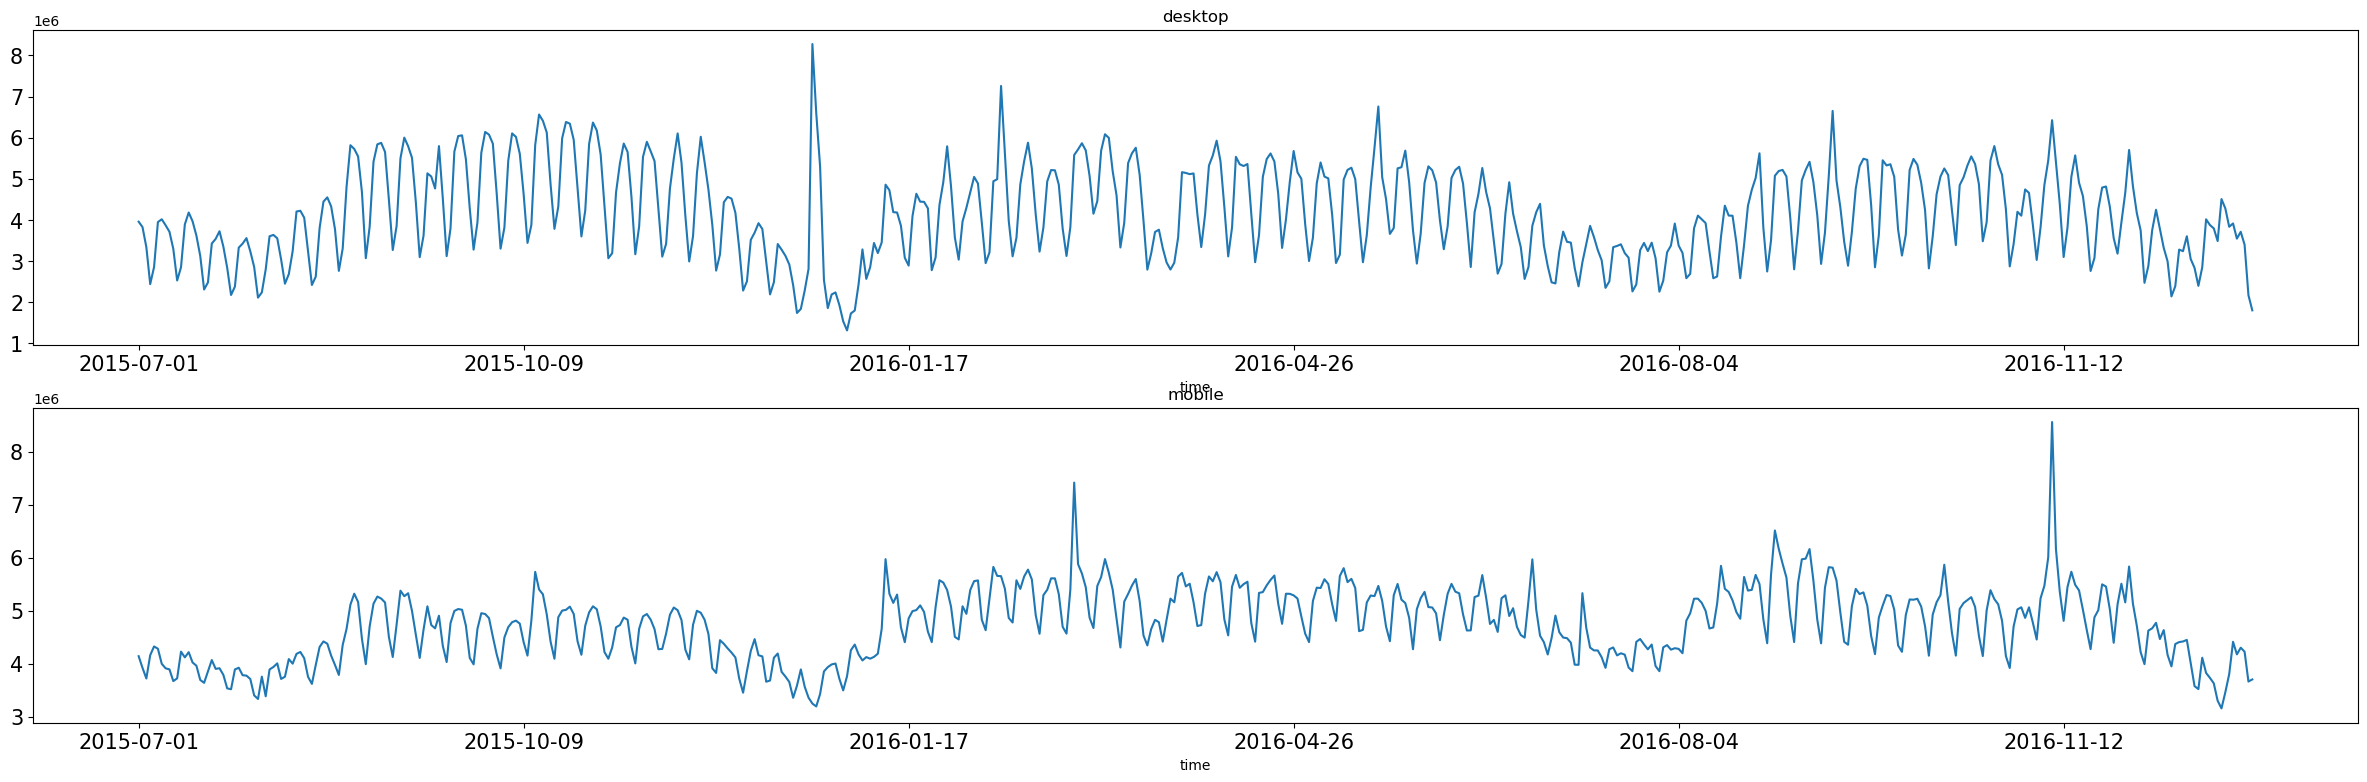

In [12]:
# 同时在两张图中画出desktop和mobile的点击量
fig, ax = plt.subplots(2, 1, figsize=(30, 9))
dataES_desktop_sum.plot(ax=ax[0], fontsize=15)
ax[0].set_xlabel('time')
ax[0].set_title('desktop')
dataES_mobile_sum.plot(ax=ax[1], fontsize=15)
ax[1].set_xlabel('time')
ax[1].set_title('mobile')
plt.show()

桌面端

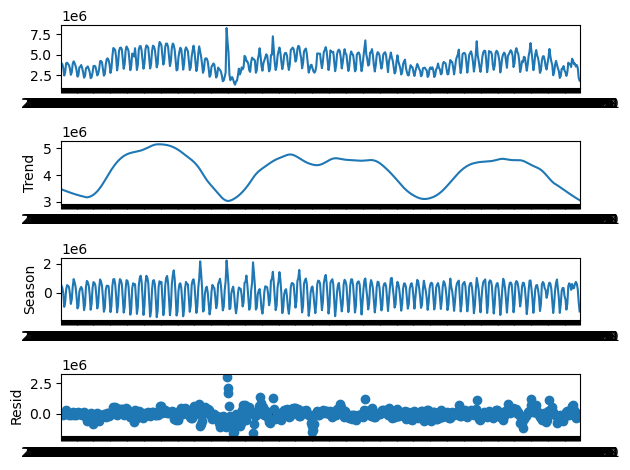

In [13]:
decomposition_desktop = tsa.STL(dataES_desktop_sum, period=28).fit()
decomposition_desktop.plot()
# 趋势效应
trend = decomposition_desktop.trend
# 季节效应
seasonal = decomposition_desktop.seasonal
# 残差项
residual = decomposition_desktop.resid

移动端

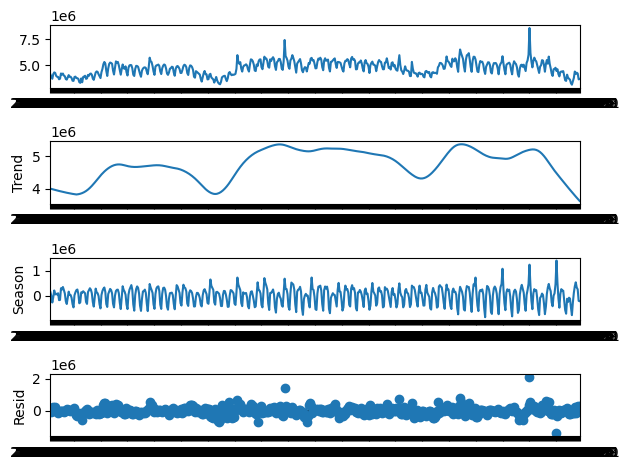

In [14]:
decomposition_mobile = tsa.STL(dataES_mobile_sum, period=28).fit()
decomposition_mobile.plot()
# 趋势效应
trend = decomposition_mobile.trend
# 季节效应
seasonal = decomposition_mobile.seasonal
# 残差项
residual = decomposition_mobile.resid

### 平稳性检验

In [15]:
def test_stationarity(timeseries, alpha=1e-3):
    dftest = tsa.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
        
    print(dfoutput)
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:
        print('X 是平稳的')
        return True
    else:
        print('X 是非平稳的')
        return False

In [16]:
test_stationarity(dataES_desktop_sum)
print('*'*50)
test_stationarity(dataES_mobile_sum)

Test Statistic                  -2.768782
p-value                          0.062873
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64
X 是非平稳的
**************************************************
Test Statistic                  -2.797593
p-value                          0.058618
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64
X 是非平稳的


False

因此，desktop序列和mobile的序列均非平稳

### 进行差分操作

In [17]:
# 对序列进行季节差分-28步
# datas7_seasonal = datas7.diff(8)
# datas94_seasonal = datas94.diff(8)
datasDesktop_seasonal = dataES_desktop_sum.diff(28).dropna()
datasMobile_seasonal = dataES_mobile_sum.diff(28).dropna()

test_stationarity(datasDesktop_seasonal)
print('*'*50)
test_stationarity(datasMobile_seasonal)

Test Statistic                  -4.355376
p-value                          0.000356
#Lags Used                       5.000000
Number of Observations Used    516.000000
Critical Value (1%)             -3.443087
Critical Value (5%)             -2.867158
Critical Value (10%)            -2.569762
dtype: float64
X 是平稳的
**************************************************
Test Statistic                  -4.087773
p-value                          0.001015
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
X 是非平稳的


False

可以发现：经过季节查分，desktop序列已经平稳，无需再进行常查分；但mobile序列仍未非平稳，下面进行常差分

In [18]:
datasMobile_seasonal = datasMobile_seasonal.diff(1).dropna()
test_stationarity(datasMobile_seasonal)

Test Statistic                -8.430507e+00
p-value                        1.875752e-13
#Lags Used                     1.100000e+01
Number of Observations Used    5.090000e+02
Critical Value (1%)           -3.443263e+00
Critical Value (5%)           -2.867235e+00
Critical Value (10%)          -2.569803e+00
dtype: float64
X 是平稳的


True

### 检验残差是否为白噪声

In [19]:
def test_white_noise(data):
    return sm.stats.acorr_ljungbox(data.dropna(), return_df=True) # 小于阈值则为非白噪声

In [20]:
test_white_noise(datasDesktop_seasonal)

,lb_stat,lb_pvalue
1,330.488040,7.524746e-74
2,535.832139,4.421091e-117
3,685.410264,3.059144e-148
4,803.715379,1.203856e-172
5,906.583966,1.000369e-193
6,1010.595985,4.567245e-215
7,1106.964709,9.200542e-235
8,1183.972933,2.783115e-250
9,1245.673092,1.669681e-262
10,1303.346616,7.251982e-274


In [21]:
test_white_noise(datasMobile_seasonal)

,lb_stat,lb_pvalue
1,17.179841,3.400256e-05
2,31.133067,1.735962e-07
3,34.370997,1.654223e-07
4,36.061067,2.811187e-07
5,36.094471,9.093654e-07
6,38.472499,9.080134e-07
7,39.615874,1.490818e-06
8,39.696039,3.649558e-06
9,39.815919,8.204755e-06
10,40.312330,1.492759e-05


可以发现残差项是白噪声

### 画出ACF和PACF图像

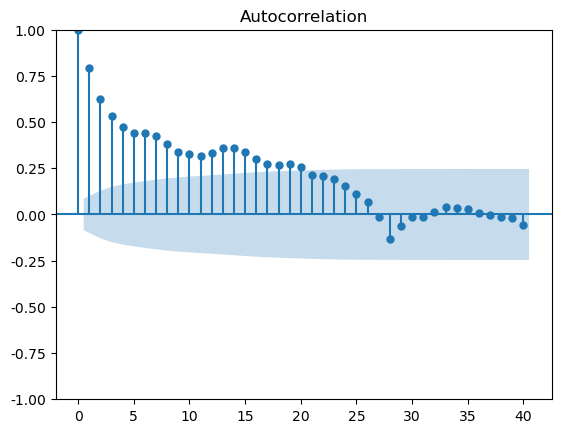

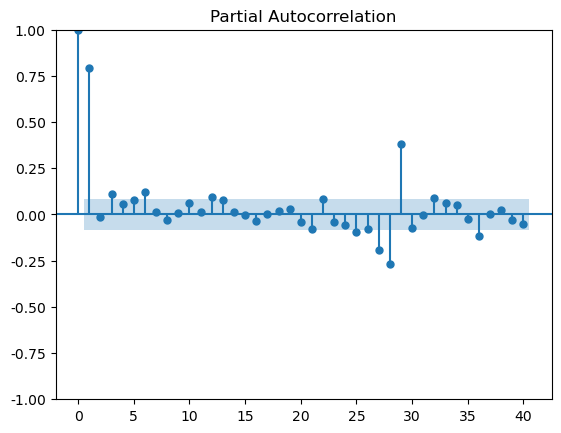

In [22]:
fig = plot_acf(datasDesktop_seasonal, lags=40)
fig = plot_pacf(datasDesktop_seasonal, lags=40)

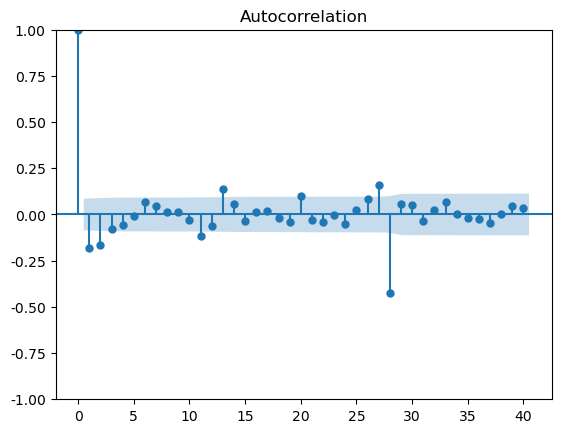

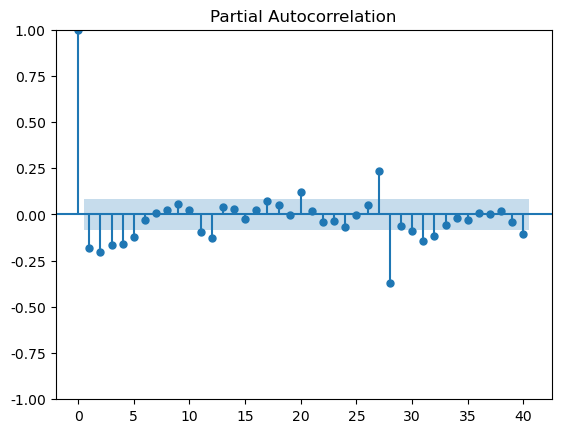

In [23]:
fig = plot_acf(datasMobile_seasonal, lags=40)
fig = plot_pacf(datasMobile_seasonal, lags=40)

### 进行网格搜索

In [24]:
def grid_search(data):
    p = q = range(0, 3)
    s = [28]
    d = [0,1]
    PDQs = list(itertools.product(p, d, q, s))
    pdq = list(itertools.product(p, d, q))
    params = []
    seasonal_params = []
    results = []
    grid = pd.DataFrame()
    
    for param in pdq:
        for seasonal_param in PDQs:
            mod = tsa.SARIMAX(data, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            result = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, result.aic))
            params.append(param)
            seasonal_params.append(seasonal_param)
            results.append(result.aic)
            
    grid['pdq'] = params
    grid['PDQs'] = seasonal_params
    grid['aic'] = results
    print(grid[grid['aic'] == min(grid['aic'])])

In [ ]:
grid_search(dataES_desktop_sum.dropna())

In [ ]:
grid_search(dataES_mobile_sum.dropna())

可以确定desktop序列的参数为：pdq(0,1,2) PDQs(2,1,2,8)

mobile序列的参数为：pdq(1,1,2) PDQs(2,1,2,8)

### 接下来进行参数检验

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49214D+01    |proj g|=  7.93320D-01


 This problem is unconstrained.



At iterate    5    f=  1.46989D+01    |proj g|=  6.67856D-02

At iterate   10    f=  1.46589D+01    |proj g|=  1.88102D-02

At iterate   15    f=  1.46566D+01    |proj g|=  7.61363D-03

At iterate   20    f=  1.46561D+01    |proj g|=  8.29036D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     23      1     0     0   3.756D-05   1.466D+01
  F =   14.656055441551715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


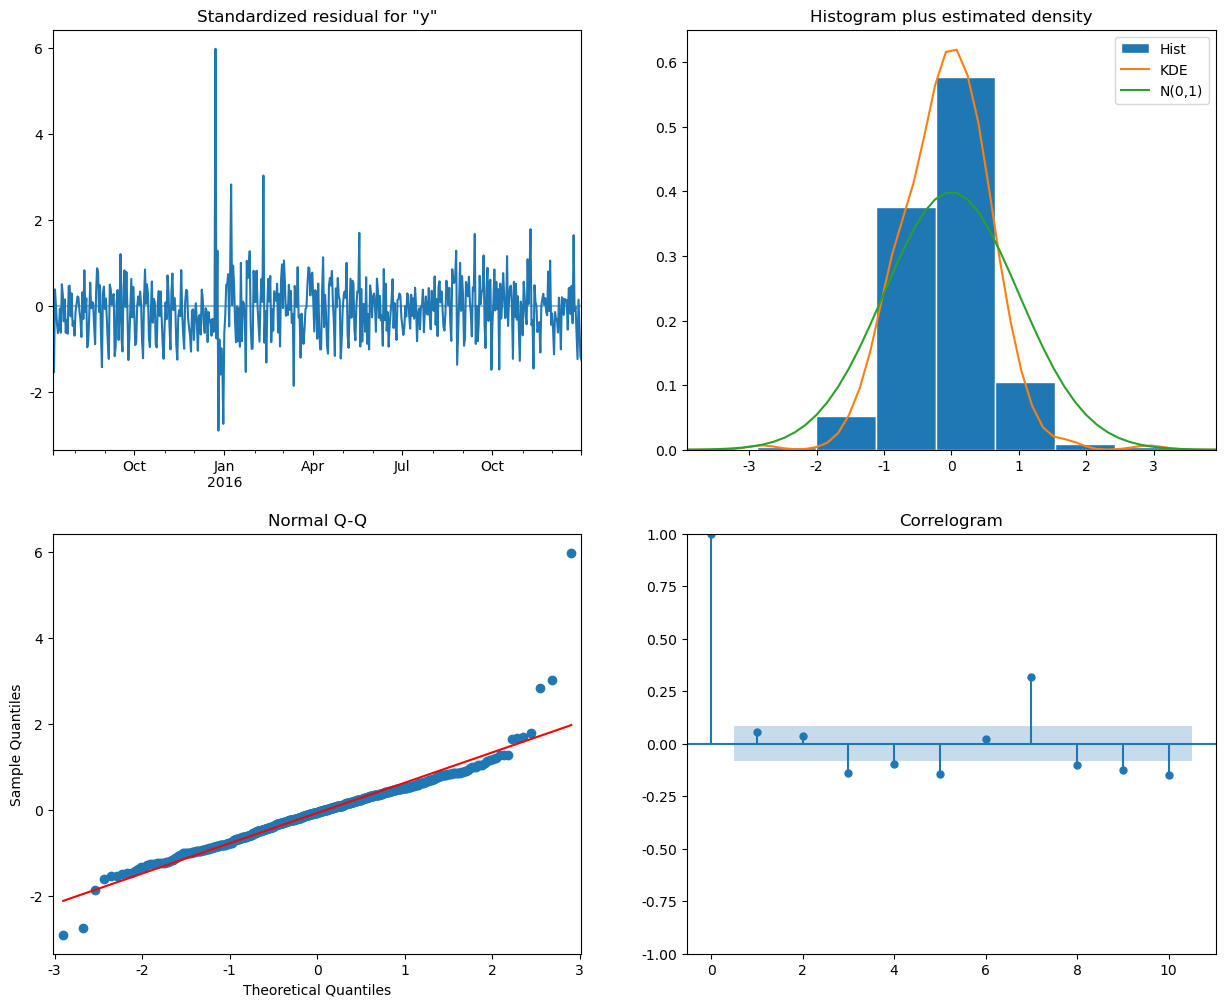

In [26]:
mod_desktop = tsa.SARIMAX(dataES_desktop_sum, order=(0,1,2), seasonal_order=(2,1,2,8))
results_desktop = mod_desktop.fit()
test_white_noise(results_desktop.resid)
fig_results_desktop = results_desktop.plot_diagnostics(figsize=(15,12))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42810D+01    |proj g|=  4.86735D-01

At iterate    5    f=  1.41349D+01    |proj g|=  2.24531D-02

At iterate   10    f=  1.41271D+01    |proj g|=  9.65717D-03

At iterate   15    f=  1.41171D+01    |proj g|=  5.89804D-02

At iterate   20    f=  1.41057D+01    |proj g|=  1.21668D-02

At iterate   25    f=  1.41049D+01    |proj g|=  1.84562D-03

At iterate   30    f=  1.41049D+01    |proj g|=  3.59588D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

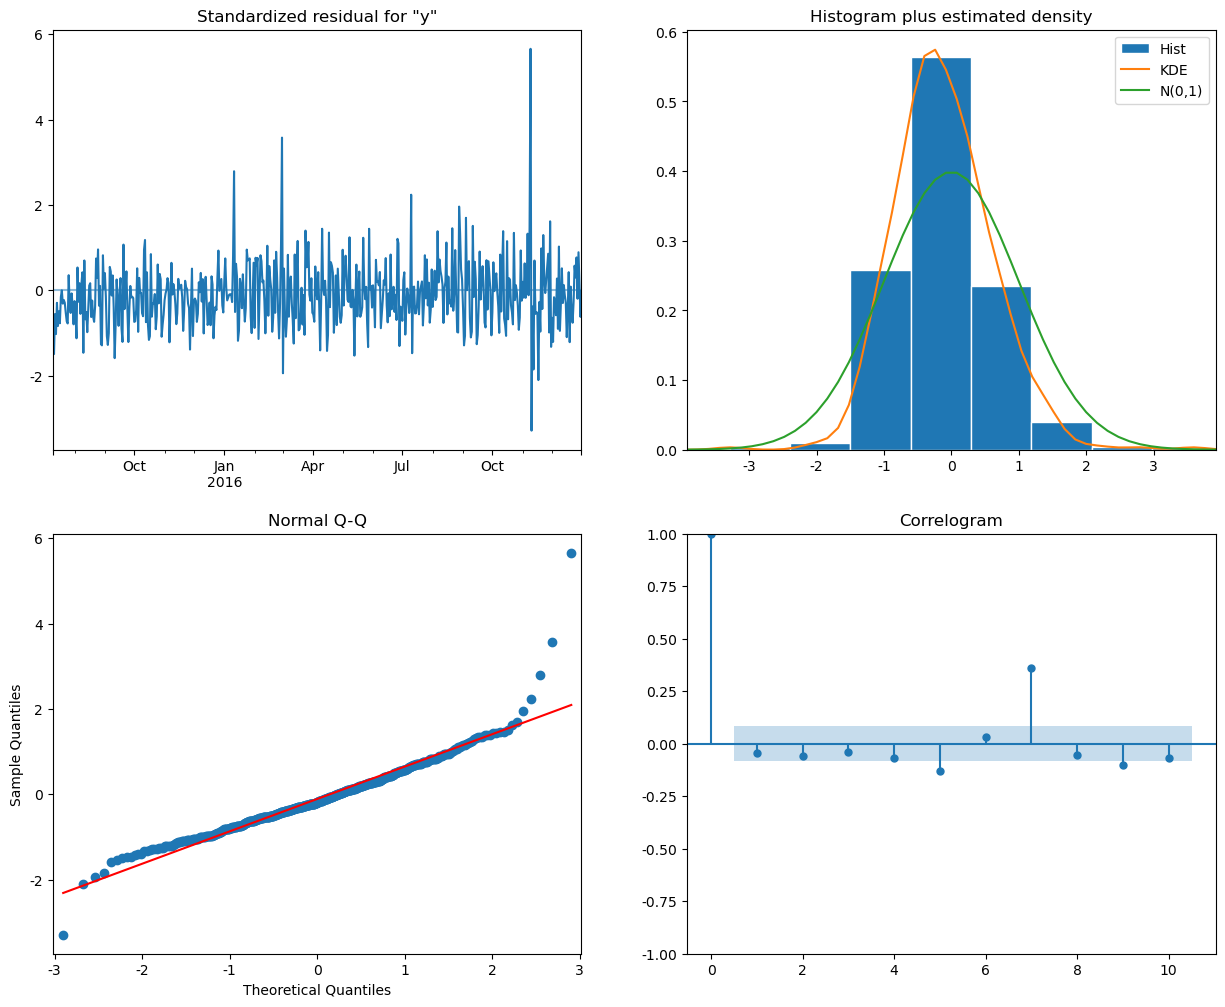

In [27]:
mod_mobile = tsa.SARIMAX(dataES_mobile_sum, order=(1,1,2), seasonal_order=(2,1,2,8))
results_mobile = mod_mobile.fit()
test_white_noise(results_mobile.resid)
fig_result_mobile = results_mobile.plot_diagnostics(figsize=(15,12))

### 预测未来两个月的点击量

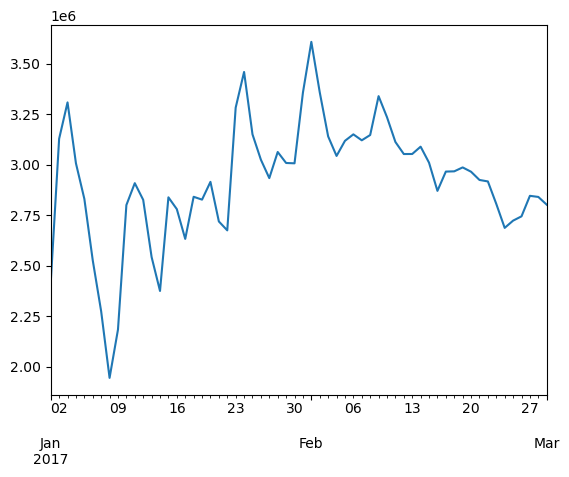

In [33]:
forecasts_desktop = results_desktop.get_forecast(steps=60)
fig = forecasts_desktop.predicted_mean.plot()

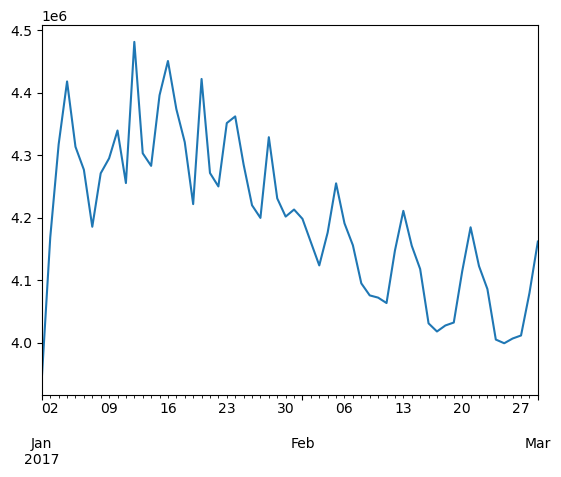

In [34]:
forecasts_mobile = results_mobile.get_forecast(steps=60)
fig = forecasts_mobile.predicted_mean.plot()

### 展示最终预测结果

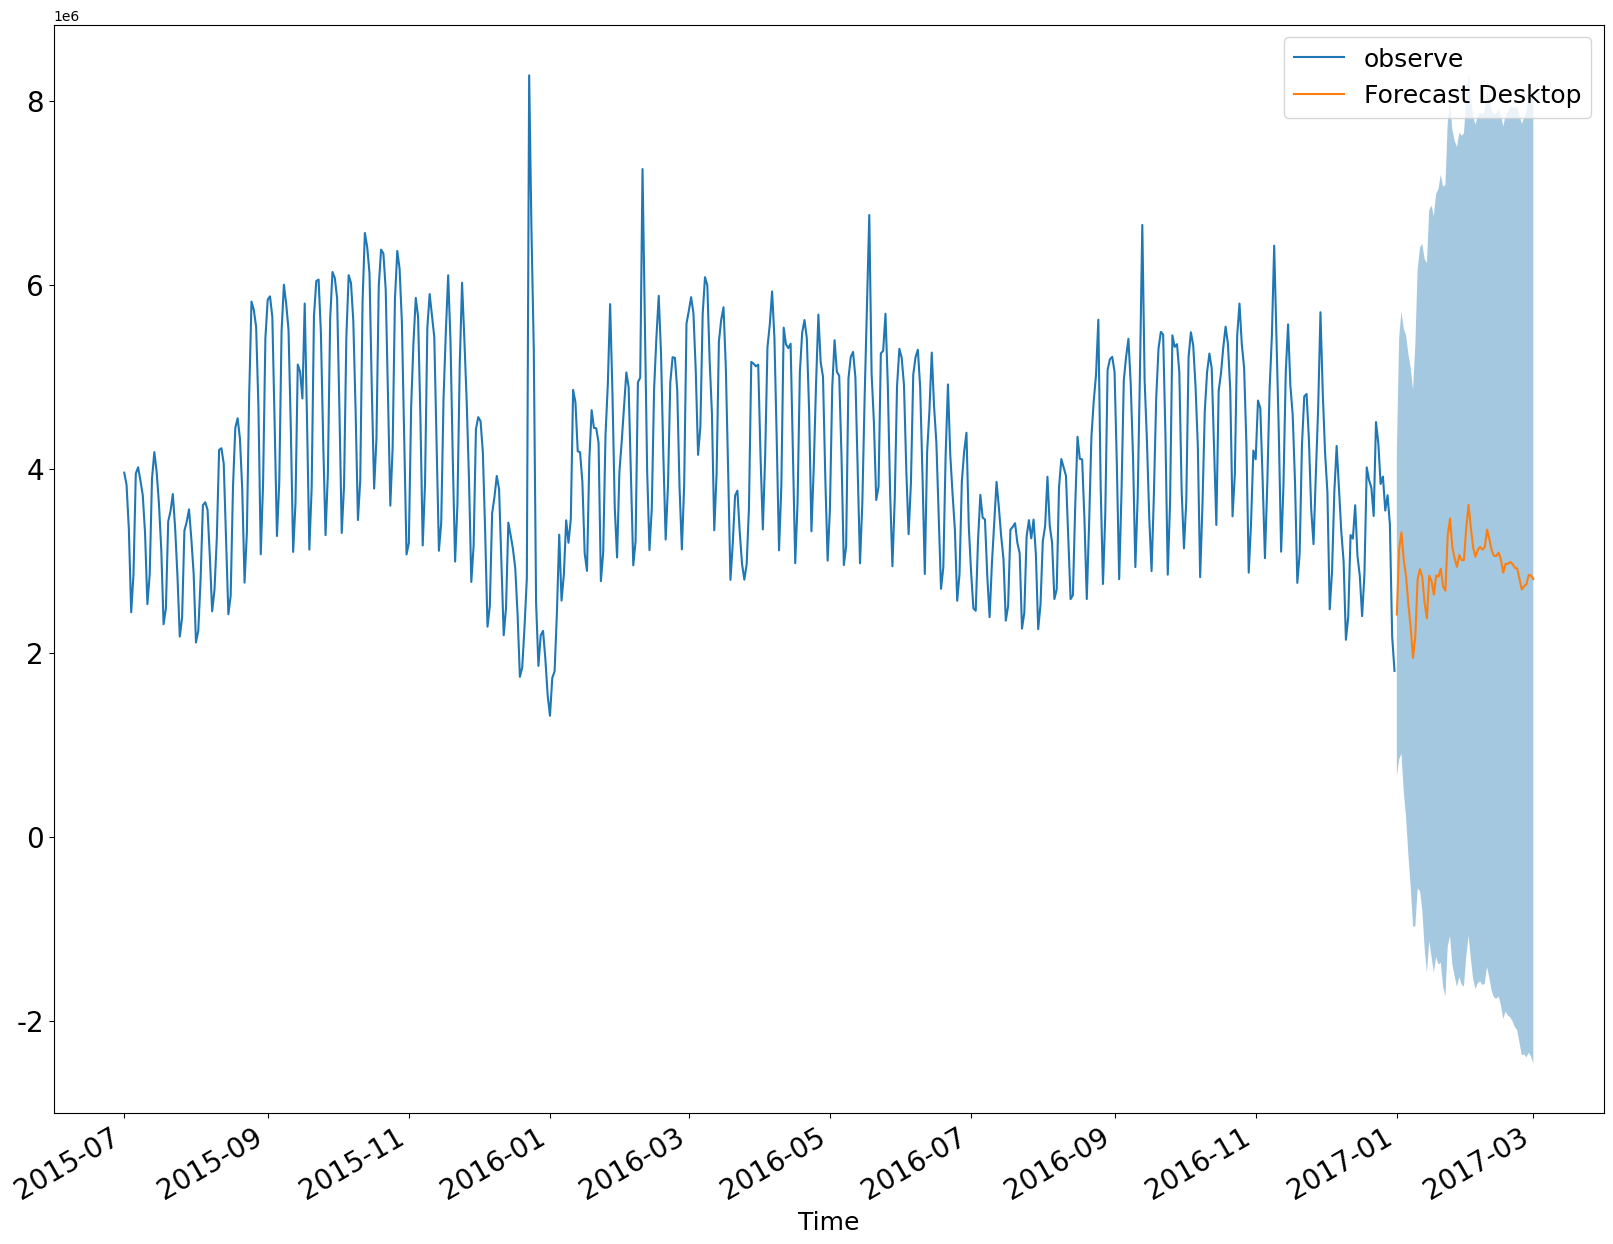

In [35]:
dataES_desktop_sum.index = pd.to_datetime(dataES_desktop_sum.index)
forecasts_desktop.predicted_mean.index = pd.to_datetime(forecasts_desktop.predicted_mean.index)

# 重新绘制图形
fig, ax = plt.subplots(figsize=(20,16))
ax.plot(dataES_desktop_sum, label='observe')
forecasts_desktop.predicted_mean.plot(ax=ax, label='Forecast Desktop')
ax.fill_between(forecasts_desktop.conf_int().index, 
                forecasts_desktop.conf_int().iloc[:, 0], 
                forecasts_desktop.conf_int().iloc[:, 1], alpha=0.4)
ax.set_xlabel('Time', fontsize=18)
ax.legend(loc='best', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

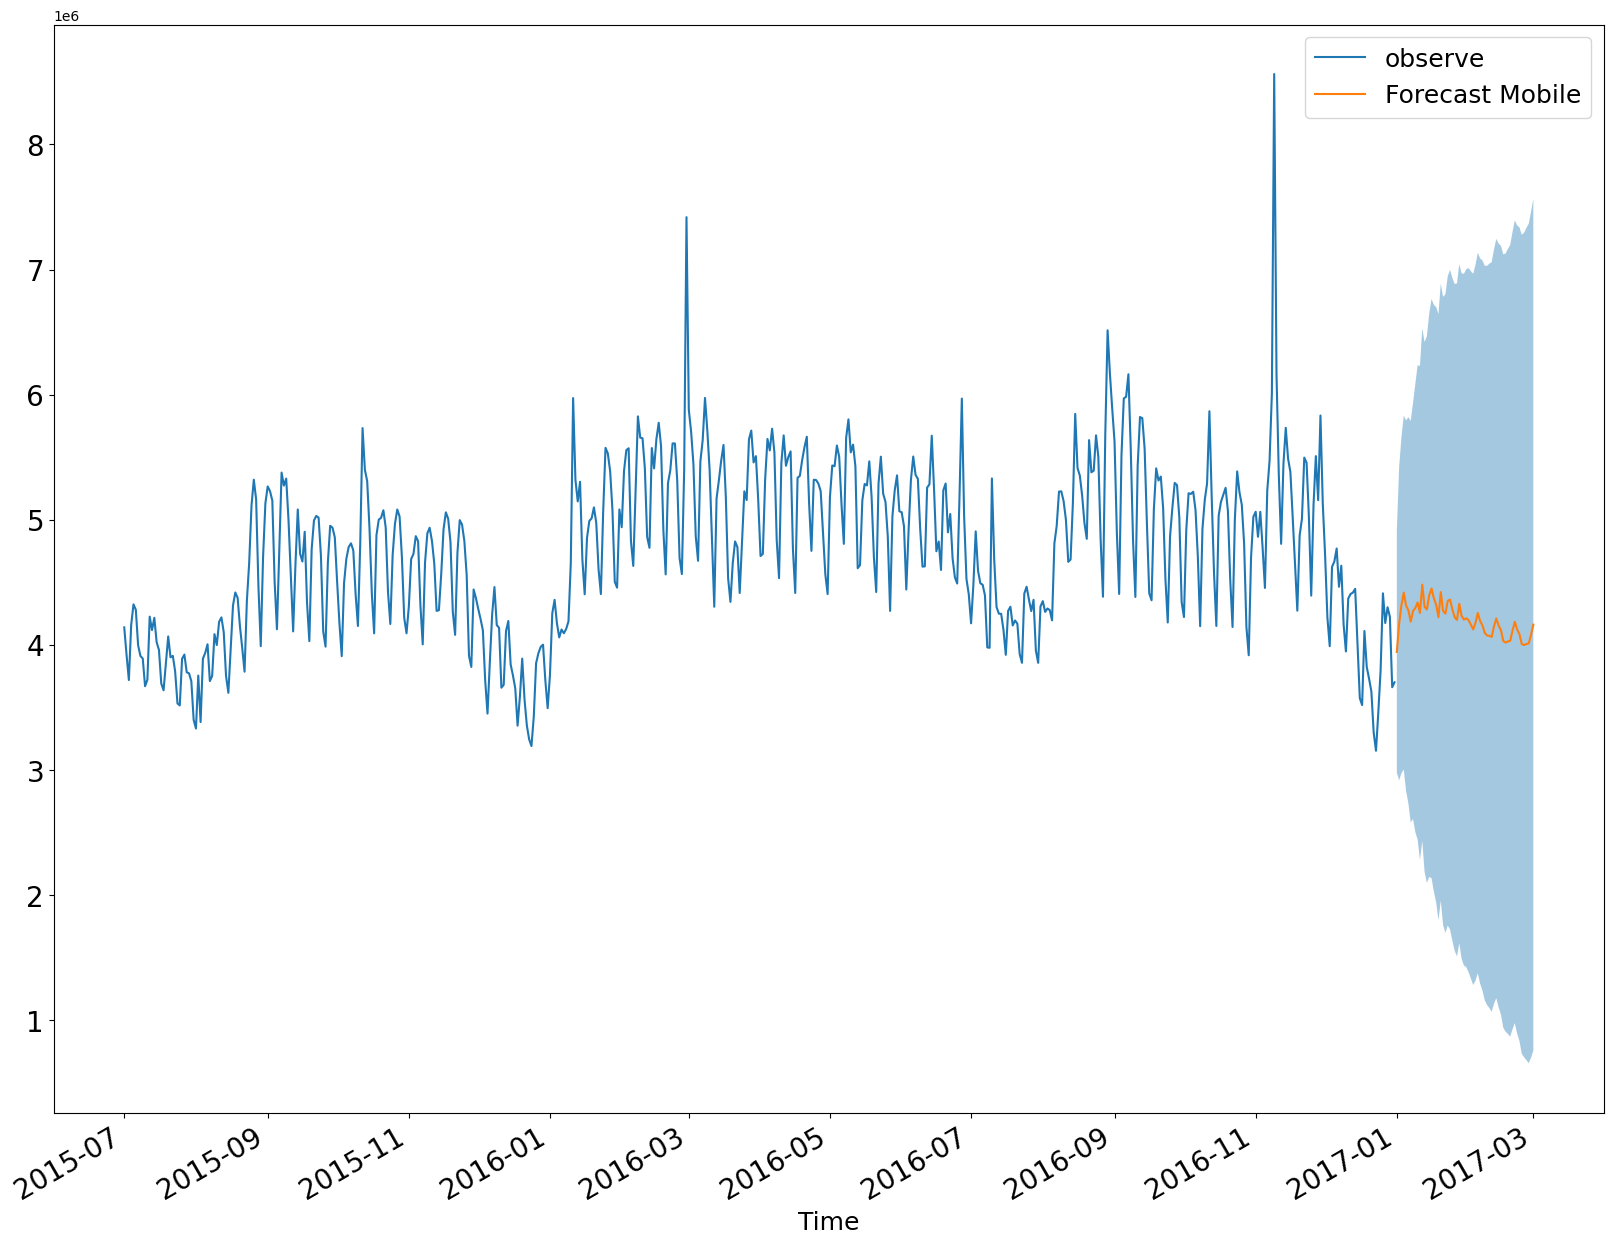

In [36]:
dataES_mobile_sum.index = pd.to_datetime(dataES_mobile_sum.index)
forecasts_mobile.predicted_mean.index = pd.to_datetime(forecasts_mobile.predicted_mean.index)

# 重新绘制图形
fig, ax = plt.subplots(figsize=(20,16))
ax.plot(dataES_mobile_sum, label='observe')
forecasts_mobile.predicted_mean.plot(ax=ax, label='Forecast Mobile')
ax.fill_between(forecasts_mobile.conf_int().index, 
                forecasts_mobile.conf_int().iloc[:, 0], 
                forecasts_mobile.conf_int().iloc[:, 1], alpha=0.4)
ax.set_xlabel('Time', fontsize=18)
ax.legend(loc='best', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### 与ARIMA模型进行对比

定阶选取参数——desktop

In [62]:
import statsmodels.tsa.api as smtsa
import warnings

# 忽略所有警告
warnings.filterwarnings('ignore')

# d = 1
aicVal=[]
for p in range(0, 6):
    for q in range(0, 6):
        try:
            model_d1 = smtsa.ARIMA(dataES_desktop_sum, order=(p, 1, q)).fit(method='innovations_mle')
            aicVal.append([p, q, model_d1.aic])
        except Exception as e:
            print(e)
            
print(aicVal)
min_aic = min(aicVal, key=lambda x: x[2])
best_p = min_aic[0]
best_q = min_aic[1]

print('Best p: ', best_p)
print('Best q: ', best_q)

[[0, 0, 16529.848571690665], [0, 1, 16461.77091683479], [0, 2, 16379.09304476124], [0, 3, 16284.76594512983], [0, 4, 16283.965436745106], [0, 5, 16263.569810307807], [1, 0, 16482.49746531128], [1, 1, 16522.99918822405], [1, 2, 16467.039218787908], [1, 3, 16311.378956102028], [1, 4, 18400.11135284652], [1, 5, 17668.87712983258], [2, 0, 16395.208602021587], [2, 1, 16211.491408983202], [2, 2, 16105.325698640248], [2, 3, 16079.808659991228], [2, 4, 16044.360009924545], [2, 5, 16043.737097257519], [3, 0, 16330.392229203004], [3, 1, 16190.120741440121], [3, 2, 16126.811988950445], [3, 3, 16167.340081696017], [3, 4, 16061.09415575807], [3, 5, 16092.265819520631], [4, 0, 16225.30830326835], [4, 1, 16148.320678141557], [4, 2, 16036.459548678851], [4, 3, 16034.990953865301], [4, 4, 15998.815248055049], [4, 5, 15989.137440124236], [5, 0, 16090.848897528798], [5, 1, 16089.439512962708], [5, 2, 16052.9864936373], [5, 3, 16050.459586348952], [5, 4, 15979.391099585202], [5, 5, 15951.77639299228]]
Bes

定阶选取参数——mobile

In [63]:
import statsmodels.tsa.api as smtsa
import warnings

# 忽略所有警告
warnings.filterwarnings('ignore')

# d = 1
aicVal=[]
for p in range(0, 6):
    for q in range(0, 6):
        try:
            model_d1 = smtsa.ARIMA(dataES_mobile_sum, order=(p, 1, q)).fit(method='innovations_mle')
            aicVal.append([p, q, model_d1.aic])
        except Exception as e:
            print(e)
            
print(aicVal)
min_aic = min(aicVal, key=lambda x: x[2])
best_p = min_aic[0]
best_q = min_aic[1]

print('Best p: ', best_p)
print('Best q: ', best_q)

[[0, 0, 15800.742576502904], [0, 1, 15800.439745733958], [0, 2, 15700.971238830518], [0, 3, 15682.796709225986], [0, 4, 15687.153153920086], [0, 5, 15685.47458587482], [1, 0, 15801.322688837055], [1, 1, 15736.301809765824], [1, 2, 15685.513913858113], [1, 3, 16396.75516201552], [1, 4, 16259.23012294685], [1, 5, 15676.633146249442], [2, 0, 15759.444111388528], [2, 1, 15673.81789808015], [2, 2, 15730.599214894955], [2, 3, 15591.774411879396], [2, 4, 15564.315905672644], [2, 5, 15729.176076388023], [3, 0, 15747.203571130125], [3, 1, 15669.282449382787], [3, 2, 15672.844472839986], [3, 3, 15635.736182179762], [3, 4, 15596.452158912585], [3, 5, 15737.105079724424], [4, 0, 15693.500438713738], [4, 1, 15631.637197212622], [4, 2, 15553.70625796309], [4, 3, 15650.203030520624], [4, 4, 15533.276646283737], [4, 5, 15499.164597277137], [5, 0, 15603.512127958931], [5, 1, 15592.452761112047], [5, 2, 15545.490956363365], [5, 3, 15549.160876747374], [5, 4, 15502.872636773998], [5, 5, 15473.71468292439

进行模型拟合

In [46]:
import statsmodels.tsa.api as smtsa

model_desktop = smtsa.ARIMA(dataES_desktop_sum, order=(5, 1, 5))
model_fit_d = model_desktop.fit()

model_mobile = smtsa.ARIMA(dataES_mobile_sum, order=(5, 1, 5))
model_fit_m = model_mobile.fit()

进行未来预测

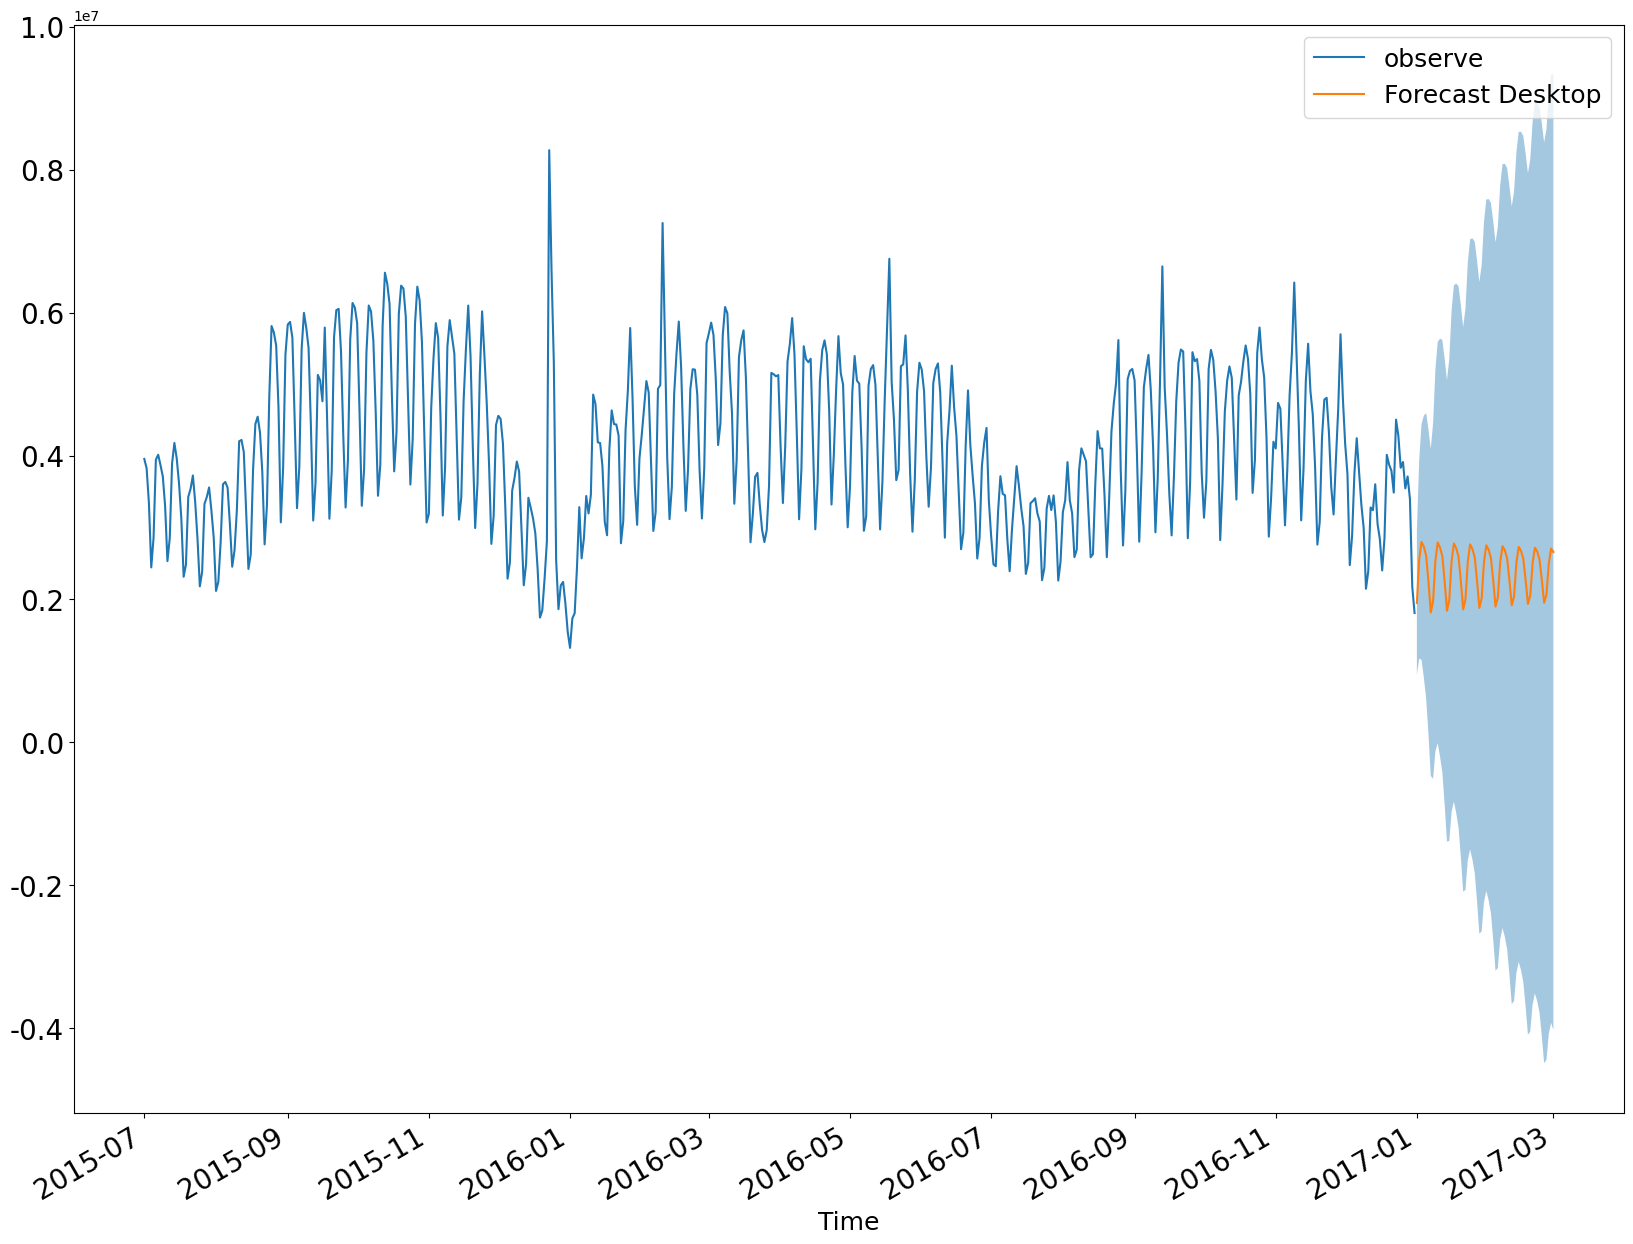

In [47]:
forecasts_desktop = model_fit_d.get_forecast(steps=60)

dataES_desktop_sum.index = pd.to_datetime(dataES_desktop_sum.index)
forecasts_desktop.predicted_mean.index = pd.to_datetime(forecasts_desktop.predicted_mean.index)

# 重新绘制图形
fig, ax = plt.subplots(figsize=(20,16))
ax.plot(dataES_desktop_sum, label='observe')
forecasts_desktop.predicted_mean.plot(ax=ax, label='Forecast Desktop')
ax.fill_between(forecasts_desktop.conf_int().index, 
                forecasts_desktop.conf_int().iloc[:, 0], 
                forecasts_desktop.conf_int().iloc[:, 1], alpha=0.4)
ax.set_xlabel('Time', fontsize=18)
ax.legend(loc='best', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

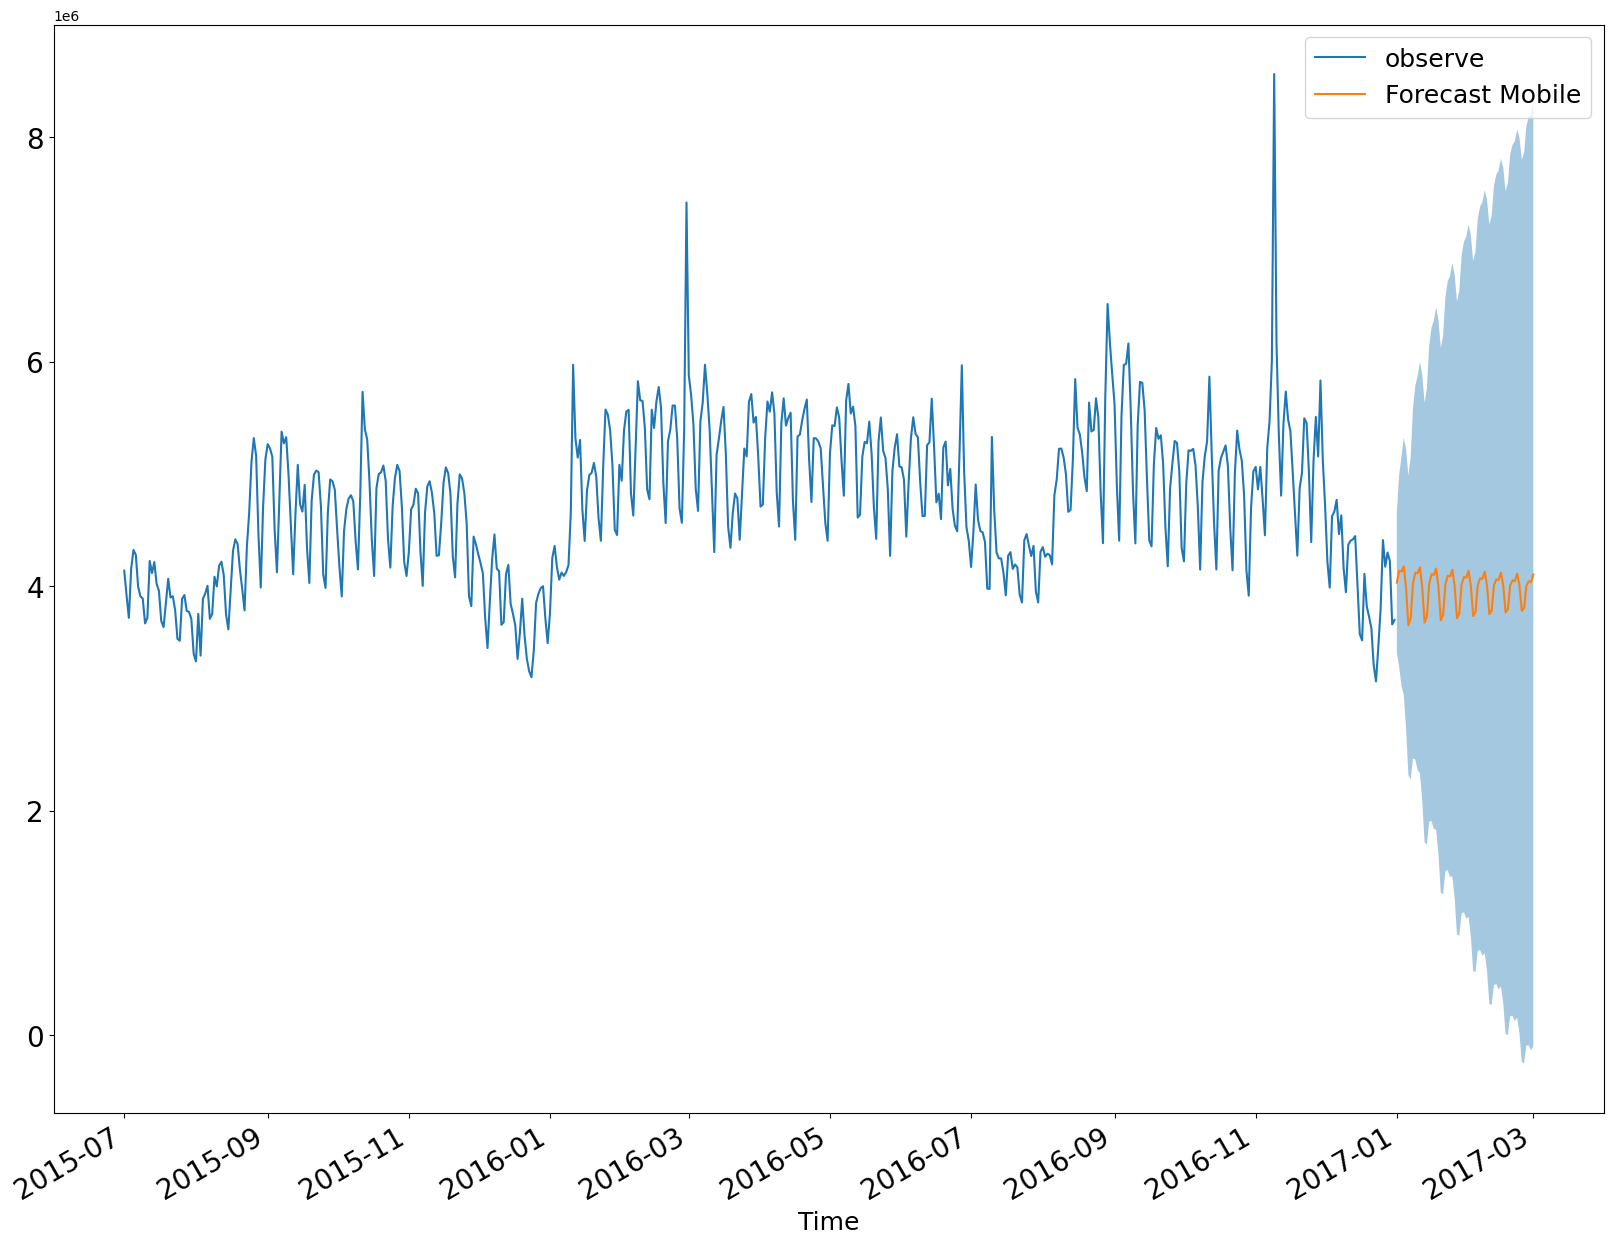

In [48]:
forecasts_mobile = model_fit_m.get_forecast(steps=60)

dataES_mobile_sum.index = pd.to_datetime(dataES_mobile_sum.index)
forecasts_mobile.predicted_mean.index = pd.to_datetime(forecasts_mobile.predicted_mean.index)

# 重新绘制图形
fig, ax = plt.subplots(figsize=(20,16))
ax.plot(dataES_mobile_sum, label='observe')
forecasts_mobile.predicted_mean.plot(ax=ax, label='Forecast Mobile')
ax.fill_between(forecasts_mobile.conf_int().index, 
                forecasts_mobile.conf_int().iloc[:, 0], 
                forecasts_mobile.conf_int().iloc[:, 1], alpha=0.4)
ax.set_xlabel('Time', fontsize=18)
ax.legend(loc='best', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

可以看出，与SARIMA模型相比，ARIMA模型对未来的预测已经失去了趋势性，拟合效果很差。

并且我们事先了解到：
1. ARIMA模型适合于没有季节趋势的时间序列
2. SARIMA模型适合于存在季节趋势的时间序列